# Exploring the Dataset

In [1]:
import pandas as dd
import numpy as np
import matplotlib
%matplotlib inline

In [74]:
dd.set_option('display.max_rows', 122)

### Bureau Balance

Shows history of how fast loans paid off

In [2]:
bureau_balance = dd.read_csv(filepath_or_buffer='data/bureau_balance.csv', 
                               #index_col = 'SK_ID_BUREAU',
                                dtype={'MONTHS_BALANCE': np.int64, 'STATUS': 'category'})

In [3]:
bureau_balance.dtypes

SK_ID_BUREAU         int64
MONTHS_BALANCE       int64
STATUS            category
dtype: object

In [4]:
bureau_balance[bureau_balance['SK_ID_BUREAU']==5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [5]:
bureau_balance.to_parquet('raw_data/bureau_balance.parquet')

### Bureau

In [6]:
bureau = dd.read_csv('data/bureau.csv',
                    dtype={'CREDIT_ACTIVE': 'category', 'CREDIT_CURRENCY': 'category'})

In [7]:
bureau.shape

(1716428, 17)

In [8]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

array([[<AxesSubplot:title={'center':'SK_ID_BUREAU'}>]], dtype=object)

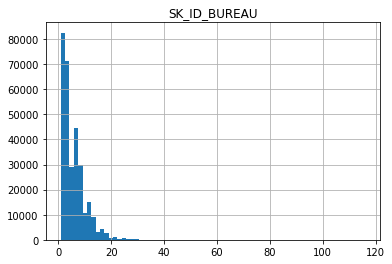

In [13]:
bureau[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count().hist(bins=70)

We can see that there are loans to customers who have multiple other historical or active loans

In [53]:
bureau.dtypes

SK_ID_CURR                   int64
SK_ID_BUREAU                 int64
CREDIT_ACTIVE             category
CREDIT_CURRENCY           category
DAYS_CREDIT                  int64
CREDIT_DAY_OVERDUE           int64
DAYS_CREDIT_ENDDATE        float64
DAYS_ENDDATE_FACT          float64
AMT_CREDIT_MAX_OVERDUE     float64
CNT_CREDIT_PROLONG           int64
AMT_CREDIT_SUM             float64
AMT_CREDIT_SUM_DEBT        float64
AMT_CREDIT_SUM_LIMIT       float64
AMT_CREDIT_SUM_OVERDUE     float64
CREDIT_TYPE                 object
DAYS_CREDIT_UPDATE           int64
AMT_ANNUITY                float64
dtype: object

In [14]:
bureau.CREDIT_TYPE.unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

### Credit Card Balance

In [22]:
cc_balance = dd.read_csv('data/credit_card_balance.csv',
                        dtype={'NAME_CONTRACT_STATUS': 'category'})

In [16]:
cc_balance.shape

(3840312, 23)

In [17]:
cc_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [23]:
cc_balance.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
MONTHS_BALANCE                   int64
AMT_BALANCE                    float64
AMT_CREDIT_LIMIT_ACTUAL          int64
AMT_DRAWINGS_ATM_CURRENT       float64
AMT_DRAWINGS_CURRENT           float64
AMT_DRAWINGS_OTHER_CURRENT     float64
AMT_DRAWINGS_POS_CURRENT       float64
AMT_INST_MIN_REGULARITY        float64
AMT_PAYMENT_CURRENT            float64
AMT_PAYMENT_TOTAL_CURRENT      float64
AMT_RECEIVABLE_PRINCIPAL       float64
AMT_RECIVABLE                  float64
AMT_TOTAL_RECEIVABLE           float64
CNT_DRAWINGS_ATM_CURRENT       float64
CNT_DRAWINGS_CURRENT             int64
CNT_DRAWINGS_OTHER_CURRENT     float64
CNT_DRAWINGS_POS_CURRENT       float64
CNT_INSTALMENT_MATURE_CUM      float64
NAME_CONTRACT_STATUS          category
SK_DPD                           int64
SK_DPD_DEF                       int64
dtype: object

In [20]:
cc_balance.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

## Payments

In [24]:
payments = dd.read_csv('data/installments_payments.csv')

In [25]:
payments.shape

(13605401, 8)

In [53]:
payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [54]:
payments.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

### POS Cash Balance

In [29]:
pc_balance = dd.read_csv('data/POS_CASH_balance.csv')

In [55]:
pc_balance.shape

(10001358, 8)

In [30]:
pc_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [56]:
pc_balance.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [57]:
pc_balance.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

### Some Checks and Hypothesises

Lets check if POS CASH / Instalments and Credit Card Balance are independent different types of prev balance

In [34]:
len(np.intersect1d(pc_balance.SK_ID_PREV, payments.SK_ID_PREV))

924949

In [35]:
len(np.intersect1d(cc_balance.SK_ID_PREV, payments.SK_ID_PREV))

72466

In [36]:
len(np.intersect1d(cc_balance.SK_ID_PREV, pc_balance.SK_ID_PREV))

0

okay so they do overlap...

### Previous Loan Applications

In [45]:
prev = dd.read_csv('data/previous_application.csv',
                  dtype={'NAME_CONTRACT_TYPE': 'category', 'WEEKDAY_APPR_PROCESS_START': 'category',
                        'FLAG_LAST_APPL_PER_CONTRACT': 'category', 'NAME_CONTRACT_STATUS': 'category',
                        'NAME_SELLER_INDUSTRY': 'category', 'NAME_YIELD_GROUP': 'category'})

In [40]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [46]:
prev.dtypes

SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_DOWN_PAYMENT                float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64
FLAG_LAST_APPL_PER_CONTRACT      object
NFLAG_LAST_APPL_IN_DAY            int64
RATE_DOWN_PAYMENT               float64
RATE_INTEREST_PRIMARY           float64
RATE_INTEREST_PRIVILEGED        float64
NAME_CASH_LOAN_PURPOSE           object
NAME_CONTRACT_STATUS             object
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE                object
CODE_REJECT_REASON               object
NAME_TYPE_SUITE                  object
NAME_CLIENT_TYPE                 object
NAME_GOODS_CATEGORY              object
NAME_PORTFOLIO                   object
NAME_PRODUCT_TYPE                object


In [52]:
prev.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [58]:
prev.shape

(1670214, 37)

In [62]:
len(prev.SK_ID_PREV.unique())

1670214

SK_ID_PREV is the primary key

### Loan Applications that we are testing

In [119]:
train = dd.read_csv('data/application_train.csv',
                    index_col='SK_ID_CURR',
                    dtype={'NAME_CONTRACT_TYPE': 'category', 'CODE_GENDER': 'category',
                          'NAME_TYPE_SUITE': 'category', 'NAME_INCOME_TYPE': 'category',
                          'NAME_EDUCATION_TYPE': 'category', 'NAME_FAMILY_STATUS': 'category',
                          'NAME_HOUSING_TYPE': 'category', 'FLAG_MOBIL': 'bool', 
                          'FLAG_EMP_PHONE': 'bool', 'FLAG_WORK_PHONE': 'bool',
                          'FLAG_CONT_MOBILE': 'bool', 'FLAG_PHONE': 'bool', 'FLAG_EMAIL': 'bool',
                          'OCCUPATION_TYPE': 'category', 'CNT_FAM_MEMBERS': 'Int64', 'REGION_RATING_CLIENT': 'category',
                          'REGION_RATING_CLIENT_W_CITY': 'category', 'WEEKDAY_APPR_PROCESS_START': 'category',
                          'HOUR_APPR_PROCESS_START': 'category', 'REG_REGION_NOT_LIVE_REGION': 'bool',
                          'REG_REGION_NOT_WORK_REGION': 'bool', 'LIVE_REGION_NOT_WORK_REGION': 'bool',
                          'REG_CITY_NOT_LIVE_CITY': 'bool', 'REG_CITY_NOT_WORK_CITY': 'bool',
                          'LIVE_CITY_NOT_WORK_CITY': 'bool', 'ORGANIZATION_TYPE': 'category',
                          'OBS_30_CNT_SOCIAL_CIRCLE': 'Int64', 'DEF_30_CNT_SOCIAL_CIRCLE': 'Int64',
                          'OBS_60_CNT_SOCIAL_CIRCLE': 'Int64', 'DEF_60_CNT_SOCIAL_CIRCLE': 'Int64',
                          'DAYS_LAST_PHONE_CHANGE': 'Int64', 'FLAG_DOCUMENT_2': 'bool',
                          'FLAG_DOCUMENT_3': 'bool', 'FLAG_DOCUMENT_4': 'bool', 'FLAG_DOCUMENT_5': 'bool',
                          'FLAG_DOCUMENT_6': 'bool', 'FLAG_DOCUMENT_7': 'bool', 'FLAG_DOCUMENT_8': 'bool',
                          'FLAG_DOCUMENT_9': 'bool', 'FLAG_DOCUMENT_10': 'bool', 'FLAG_DOCUMENT_11': 'bool',
                          'FLAG_DOCUMENT_12': 'bool', 'FLAG_DOCUMENT_13': 'bool', 'FLAG_DOCUMENT_14': 'bool', 
                          'FLAG_DOCUMENT_15': 'bool', 'FLAG_DOCUMENT_16': 'bool', 'FLAG_DOCUMENT_17': 'bool',
                          'FLAG_DOCUMENT_18': 'bool', 'FLAG_DOCUMENT_19': 'bool', 'FLAG_DOCUMENT_20': 'bool',
                          'FLAG_DOCUMENT_21': 'bool', 'AMT_REQ_CREDIT_BUREAU_HOUR': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_DAY': 'Int64', 'AMT_REQ_CREDIT_BUREAU_WEEK': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_MON': 'Int64', 'AMT_REQ_CREDIT_BUREAU_QRT': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_YEAR': 'Int64'})
test = dd.read_csv('data/application_test.csv',
                    index_col='SK_ID_CURR',
                    dtype={'NAME_CONTRACT_TYPE': 'category', 'CODE_GENDER': 'category',
                          'NAME_TYPE_SUITE': 'category', 'NAME_INCOME_TYPE': 'category',
                          'NAME_EDUCATION_TYPE': 'category', 'NAME_FAMILY_STATUS': 'category',
                          'NAME_HOUSING_TYPE': 'category', 'FLAG_MOBIL': 'bool', 
                          'FLAG_EMP_PHONE': 'bool', 'FLAG_WORK_PHONE': 'bool',
                          'FLAG_CONT_MOBILE': 'bool', 'FLAG_PHONE': 'bool', 'FLAG_EMAIL': 'bool',
                          'OCCUPATION_TYPE': 'category', 'CNT_FAM_MEMBERS': 'Int64', 'REGION_RATING_CLIENT': 'category',
                          'REGION_RATING_CLIENT_W_CITY': 'category', 'WEEKDAY_APPR_PROCESS_START': 'category',
                          'HOUR_APPR_PROCESS_START': 'category', 'REG_REGION_NOT_LIVE_REGION': 'bool',
                          'REG_REGION_NOT_WORK_REGION': 'bool', 'LIVE_REGION_NOT_WORK_REGION': 'bool',
                          'REG_CITY_NOT_LIVE_CITY': 'bool', 'REG_CITY_NOT_WORK_CITY': 'bool',
                          'LIVE_CITY_NOT_WORK_CITY': 'bool', 'ORGANIZATION_TYPE': 'category',
                          'OBS_30_CNT_SOCIAL_CIRCLE': 'Int64', 'DEF_30_CNT_SOCIAL_CIRCLE': 'Int64',
                          'OBS_60_CNT_SOCIAL_CIRCLE': 'Int64', 'DEF_60_CNT_SOCIAL_CIRCLE': 'Int64',
                          'DAYS_LAST_PHONE_CHANGE': 'Int64', 'FLAG_DOCUMENT_2': 'bool',
                          'FLAG_DOCUMENT_3': 'bool', 'FLAG_DOCUMENT_4': 'bool', 'FLAG_DOCUMENT_5': 'bool',
                          'FLAG_DOCUMENT_6': 'bool', 'FLAG_DOCUMENT_7': 'bool', 'FLAG_DOCUMENT_8': 'bool',
                          'FLAG_DOCUMENT_9': 'bool', 'FLAG_DOCUMENT_10': 'bool', 'FLAG_DOCUMENT_11': 'bool',
                          'FLAG_DOCUMENT_12': 'bool', 'FLAG_DOCUMENT_13': 'bool', 'FLAG_DOCUMENT_14': 'bool', 
                          'FLAG_DOCUMENT_15': 'bool', 'FLAG_DOCUMENT_16': 'bool', 'FLAG_DOCUMENT_17': 'bool',
                          'FLAG_DOCUMENT_18': 'bool', 'FLAG_DOCUMENT_19': 'bool', 'FLAG_DOCUMENT_20': 'bool',
                          'FLAG_DOCUMENT_21': 'bool', 'AMT_REQ_CREDIT_BUREAU_HOUR': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_DAY': 'Int64', 'AMT_REQ_CREDIT_BUREAU_WEEK': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_MON': 'Int64', 'AMT_REQ_CREDIT_BUREAU_QRT': 'Int64',
                          'AMT_REQ_CREDIT_BUREAU_YEAR': 'Int64'})

In [120]:
### Bool Conversions
train.FLAG_OWN_CAR = train.FLAG_OWN_CAR.eq('Y').mul(1).astype('bool')
train.FLAG_OWN_REALTY = train.FLAG_OWN_REALTY.eq('Y').mul(1).astype('bool')
test.FLAG_OWN_CAR = test.FLAG_OWN_CAR.eq('Y').mul(1).astype('bool')
test.FLAG_OWN_REALTY = test.FLAG_OWN_REALTY.eq('Y').mul(1).astype('bool')

In [94]:
train.shape

(307511, 121)

In [70]:
list(train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [109]:
train.dtypes

TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
OWN_CAR_AGE                      float64
FLAG_MOBIL                          bool
FLAG_EMP_PHONE                      bool
FLAG_WORK_PHONE                     bool
FLAG_CONT_MOBILE

In [69]:
train[['TARGET', 'SK_ID_CURR']].groupby('TARGET').count()

,SK_ID_CURR
TARGET,
0,282686
1,24825


In [118]:
train.FLAG_DOCUMENT_2.unique()

array([0, 1])

In [117]:
train.DAYS_LAST_PHONE_CHANGE.isnull().unique()

array([False,  True])